## Seth TIQC File

In [80]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [164]:
# import .csv/excel files
filepath='/home/seth/Documents/tech_incubator/survey_responses/'
post_survey_1 = pd.read_excel(filepath+'Post-InternshipServeyResponses.xlsx', sheet_name="Form Responses 1")
post_survey_2 = pd.read_excel(filepath+'TIQC_Post-InternshipSurveyResponses.xlsx', sheet_name="Form Responses 1")
pre_survey = pd.read_excel(filepath+'Pre-InternshipSurveyResponses.xlsx', sheet_name="Form Responses 1")

In [165]:
col_name_post='How comfortable do you feel with the following workplace skills upon completion of your internship ? [Leadership ]'
col_name_pre='How comfortable are you with the following workplace skills? [Leadership ]'

output_post1=post_survey_1.groupby(col_name_post, as_index=True)[col_name_post].count().to_frame().rename(columns={col_name_post:'count'})
output_pre=pre_survey.groupby(col_name_pre, as_index=True)[col_name_pre].count().to_frame().rename(columns={col_name_pre:'count'})

In [166]:
joined_data = output_post1.join(other=output_pre, how='outer', lsuffix="_post_survey", rsuffix="_pre_survey")

In [169]:
joined_data.count_post_survey = joined_data.count_post_survey.fillna(0).astype(int)

In [176]:
#joined_data.count_post_survey = joined_data.count_post_survey.astype(int)
#joined_data.loc['total'] = joined_data.sum()
df = pd.DataFrame(joined_data)

In [177]:
cols = df.columns
df[cols] = df[cols].div(df[cols].sum(axis=0), axis=1).multiply(100)
df

,count_post_survey,count_pre_survey
Extremely Comfortable,61.904762,23.295455
"Extremely Comfortable, Extremely Uncomfortable",0.000000,0.568182
"Extremely Comfortable, Moderately Comfortable",0.000000,1.136364
Extremely Uncomfortable,0.000000,0.568182
Moderately Comfortable,33.333333,42.045455
"Moderately Comfortable, Moderately Uncomfortable",0.000000,0.568182
Moderately Uncomfortable,4.761905,6.818182
Neutral,0.000000,24.431818
"Neutral, Extremely Uncomfortable",0.000000,0.568182


<AxesSubplot: >

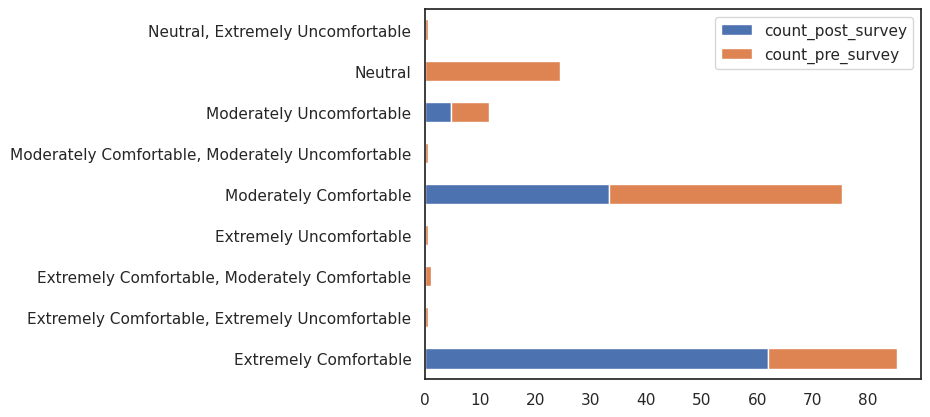

In [182]:
df.plot(kind='barh', stacked=True)

In [185]:
from scipy.stats import mannwhitneyu
chisq, p = chisquare(joined_data)
print(p)

[1.32335547e-12 1.78484740e-58]
